In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [39]:
df=pd.read_csv('Housing.csv')

In [40]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [41]:
df.shape

(545, 13)

In [31]:
#Summarize the stats
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [32]:
# Checking Null
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [33]:
# EDA Analysis
# Correlation - Very important in regression
numeric_df=df.select_dtypes(include=['int64','float64'])
numeric_df.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


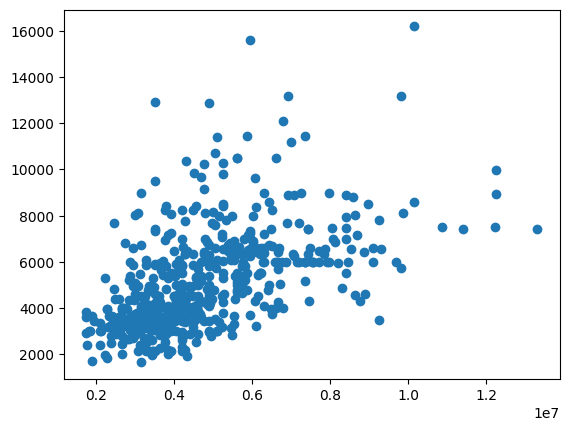

In [34]:
plt.scatter(df['price'],df['area'])

In [43]:
# Identify Categorical Columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# One-Hot Encode the Categorical Columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [44]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [45]:
# Independant and Dependant Features
X=df.drop('price',axis=1)
y=df['price']

In [46]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [47]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((381, 13), (164, 13), (381,), (164,))

In [48]:
# Standardising
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [49]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [52]:
# Print coefficients and intercept
print(lr.coef_)
print(lr.intercept_)


[ 573114.5839441    76904.32038887  484930.83182643  417752.73183493
  250750.87381533  150993.01760865   31708.31568439  194812.08212624
  223566.98726793  387951.97157268  290714.46274438   12190.64376092
 -206234.90769053]
4724373.858267716


In [53]:
# On which parameters the model has been trained
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [55]:
# Prediction with test data
y_pred=lr.predict(X_test)

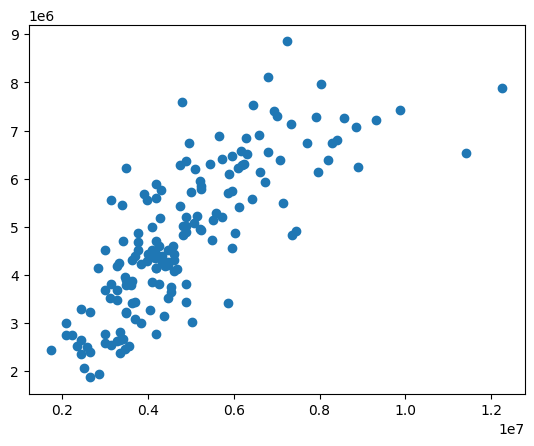

In [56]:
plt.scatter(y_test,y_pred)

<ipython-input-57-6bd516ac9af0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<Axes: xlabel='price', ylabel='Density'>

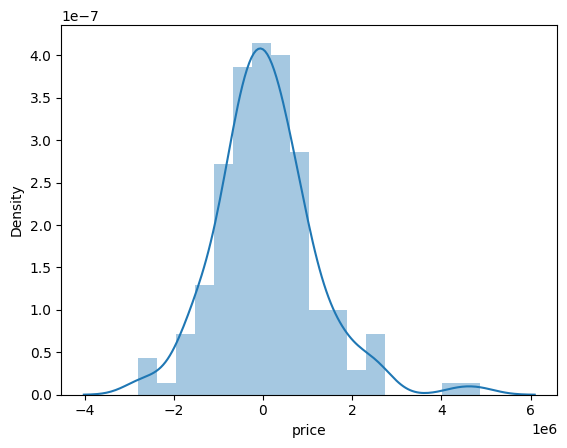

In [57]:
# Plotting with residuals - Should be normally distributed
sns.distplot(y_test-y_pred)

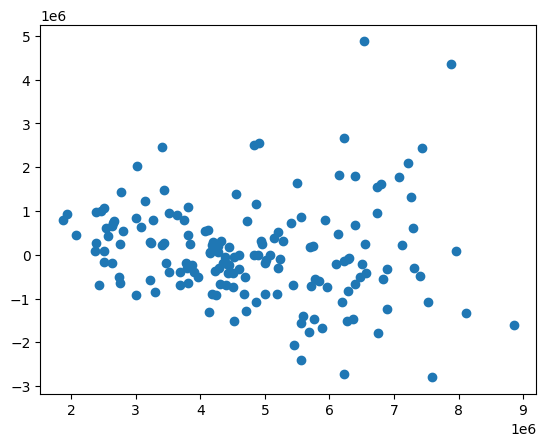

In [59]:
# Scatter plot of predictions and residuals
# Uniform distribution
plt.scatter(y_pred,y_test-y_pred)

In [61]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))


MAE: 817762.953200679
MSE: 1264406165048.4836
RMSE: 1124458.165094853
R2 Score: 0.6125155560404951


In [63]:
# R2 and adjusted R2
# R2=1-(SSR/SST)
from sklearn.metrics import r2_score
print("R2 Score:",r2_score(y_test,y_pred))


R2 Score: 0.6125155560404951


In [72]:
# New data Prediction
#X_test[0].reshape(1,-1)
lr.predict(scaler.transform(X_test[0].reshape(1,-1)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([457572.14235394])

# **Pickling the model file for Deployment**

In [74]:
import pickle
pickle.dump(lr,open('regmodel.pkl','wb'))

In [75]:
picked_model=pickle.load(open('regmodel.pkl','rb'))

In [76]:
picked_model.predict(scaler.transform(X_test[0].reshape(1,-1)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([457572.14235394])

In [77]:
from google.colab import files

# Download the pickle file
files.download('regmodel.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>